## Activity 1: Neutron Star Minimum Mass
### In this activity, you will use the liquid drop model to predict the minimum number of neutrons possible in a neutron star, and use this to work out the physical properties of neutron stars.  

#### Neutron stars are astrophysical objects detected using radio and X-ray telescopes or using gravitational waves. You can think of a neutron star as a very large nucleus, where gravity plays an additional role in the liquid drop (LD) formula. Because the star is made of neutrons, you can set Z = 0 and therefore A = N. The gravitational attraction in a neutron star has then been included as an additional term in the LD formula and depends on the number of neutrons to the power 5/3 (N5/3). 

#### Table 1 from the previous activity is reproduced below. 

##### Graph 4, below, shows the theoretically calculated binding energy per nucleon (BE/A) using the modified liquid drop model: taking account of the gravity term, setting Z=0 and using the parameters from Table 1. Because of the very large numbers of neutrons involved, a logarithmic scale is used. This means that 51 on the x-axis (for example) is actually 1051 neutrons.  

##### The data used to create Graph 4 is shown in Table 4 at the bottom of the page. 

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

%matplotlib nbagg

<IPython.core.display.Javascript object>


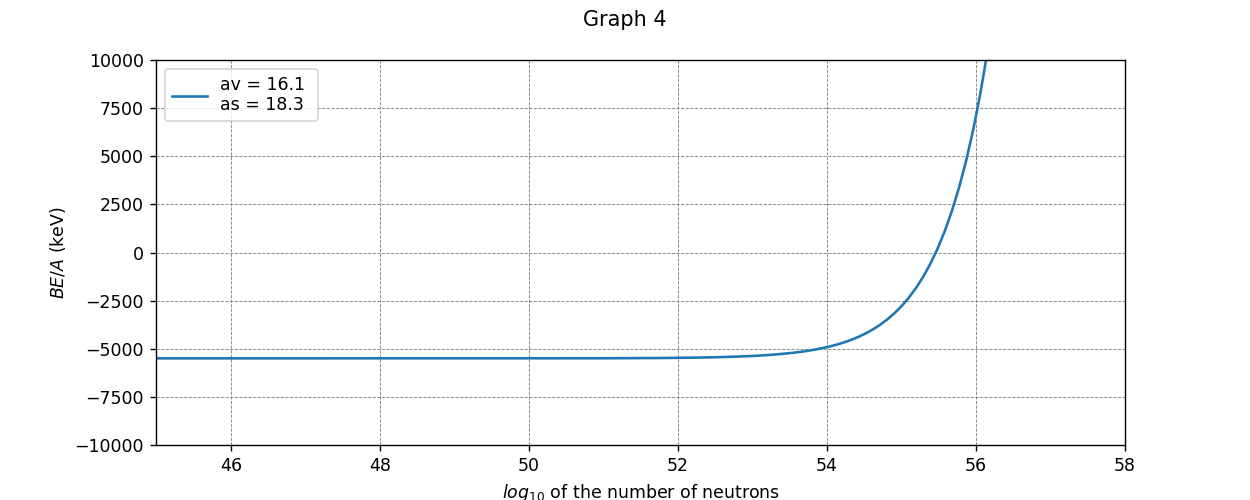

interactive(children=(BoundedFloatText(value=16.0, description='Volum:', max=20.0, step=0.1), BoundedFloatText…

In [2]:
x = np.linspace(1, 97, 1000)
fig, ax = plt.subplots(1, figsize=(10,4))
plt.suptitle('Graph 4')

def update_plot(av, aS, ac, aA, ap):
    '''
    this function is linked to the slider and
    it replots the binding energy by nucleon when the slider are changed
    '''
    ax.clear()
    y = ((av-aA)*pow(10,x)+3/5*197.3*6.708*pow(10,-45)*pow(939,2)*pow(pow(10,x),5/3)/1.2)*1000/pow(10,x)
    units = 'av = {} \nas = {}'
    ax.plot(x, y, label=units.format(av,aS))
    ax.legend(loc=2)
    ax.set_xlabel('$log_{10}$ of the number of neutrons')
    ax.set_ylabel('$BE/A$ (keV)')
    ax.set_xlim(45, 58)
    ax.set_ylim(-10000, 10000)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    return
  

#av = widgets.FloatSlider(min=0, max=20, value=16, description='Volume')
#aS = widgets.FloatSlider(min=10, max=20, value=18.3, description='Superficie')
#ac = widgets.FloatSlider(min=0.714, max=0.714, value=0.714, description='Coulomb')
#aA = widgets.FloatSlider(min=0, max=25, value=23, description='Asimetria')
#ap = widgets.FloatSlider(min=12, max=12, value=12, description='Emparellament')

av = widgets.BoundedFloatText(value=16, min=0, max=20, step=0.1, description='Volum:', disabled=False)
aS = widgets.BoundedFloatText(value=18.3, min=0, max=20, step=0.1, description='Superficie:', disabled=True)
ac = widgets.BoundedFloatText(value=0.714, min=0, max=20, step=0.1, description='Coulomb:', disabled=True)
aA = widgets.BoundedFloatText(value=23, min=0, max=25, step=0.1, description='Asimetria:', disabled=False)
ap = widgets.BoundedFloatText(value=12, min=0, max=20, step=0.1, description='Emparellament:', disabled=True)

widgets.interactive(update_plot, av=av, aS=aS, ac=ac, aA=aA, ap=ap)

##### En aquesta quarta part del repte, utilitzarà els paràmetres del model de l’activitat 1 per predir les propietats de les estrelles de neutrons.

##### Les tasques es mostren a continuació en cursiva.  Les respostes a les preguntes amb una (Q) al costat es demanaran al "Neutron Star Quiz" (a la pàgina web principal).
#### Activitat 3a
##### Quin és el nombre mínim de neutrons necessari per formar una estrella de neutrons i quin radi tindrà aquesta estrella?
##### Introduïu els valors dels termes de volum i asimetria a la taula 1 anterior. El full de càlcul calcularà immediatament el nombre mínim de neutrons necessari per tenir una estrella lligada i el radi corresponent de l'estrella. Aquests valors es mostraran a continuació.

In [48]:

def update_values(av, aA):
    global neutron_number
    neutron_number = 2.244*pow(10,54)*pow(aA-av, 1.5)
    if type(neutron_number) == complex:
        print('Valors no compatibles amb el MGL')
    else:
        print('Pot existir un nucli massiu amb interacció gravitatòria sempre que el nombre de neutrons sigui almenys:\
             {:.3g} Neutrons'.format(neutron_number))
        radi = 1.2*pow(10,-18)*pow(neutron_number, 1/3)
        print('')
        print('Tingueu en compte que el nombre de neutrons es dóna en el format 1.23E+45. Això significa 1,23 x 1045')
        print('')
        print('El radi de l’estrella de neutrons és R = {:.4g} Km'.format(radi))
    return
widgets.interact(update_values, av=av, aA=aA)

interactive(children=(BoundedFloatText(value=16.1, description='Volum:', max=20.0, step=0.1), BoundedFloatText…

<function __main__.update_values(av, aA)>

#### Activitat 3b
##### (Q) Quina és la massa mínima d’estrelles de neutrons que obté per a una estrella de neutrons, en unitats de masses solars?
##### Si un neutró té una massa d’1.67 x 10-27 kg, quina és la massa de l’estrella de neutrons calculada amunt? Introduïu la vostra resposta (o càlcul) a continuació:

In [49]:

massa = 1.67E-27*neutron_number

input('La massa de l\'estrella de neutrons (en kg) és: ')
print('{:.3g}'.format(massa))

# fer un if q calculi rangs valids d'aquest input per donar feedback

La massa de l'estrella de neutrons (en kg) és: 878
4.83e+28


In [71]:
massa = 1.67E-27*neutron_number
print(massa)
print('{:.3g}'.format(massa))
def check(box):
    if np.abs(box - massa) < pow(10,26) :
        print('good job')
    else:
        print('try again')
box = widgets.FloatText(
    placeholder='Introdueix la massa',
    description='Massa de l\'estrella de neutrons:',
    disabled=False
)
widgets.interact(check, box=box)

4.833740794196355e+28
4.83e+28


interactive(children=(FloatText(value=0.0, description="Massa de l'estrella de neutrons:"), Output()), _dom_cl…

<function __main__.check(box)>

#### La massa del Sol és de 1.989 x 1030 kg. Utilitzeu això per convertir la vostra resposta anterior en la massa de l'estrella de neutrons en termes de masses solars. Introduïu la vostra resposta (o càlcul) a continuació:

In [ ]:
input('La massa de l\'estrella de neutrons (en masses solars) és: ')
# el mateix comentari que a dalt

#### Activitat 3c
##### (Q) Quina seria la densitat d'aquesta estrella de neutrons?
##### Calculeu la densitat d’aquesta estrella de neutrons en kg / m3 dividint la seva massa pel seu volum (suposant que és una esfera). Introduïu la vostra resposta (o càlcul) a continuació:

In [ ]:
input('La densitat de l\'estrella de neutrons (en kg per litre) és: ')
# el mateix comentari que a dalt

#### Activitat 3d
##### Només els termes de volum i asimetria contribueixen a l'energia d'enllaç d'una estrella de neutrons (proveu de canviar els altres paràmetres de la taula 1 anterior per convèncer-vos d'això). Per què creieu que és així?
##### Proveu de canviar els termes de volum i asimetria cap amunt o cap avall en 1 MeV. Quant canvia la vostra predicció sobre la massa i el radi mínims de les estrelles de neutrons?
##### [Nota: no cal que registreu les respostes a aquesta pregunta]
##### Ben fet en completar aquesta activitat. Ara torneu a la pàgina web per completar les preguntes de Modelant Estrelles de Neutrons

#### Print dependencies.

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p ipywidgets,pandas,numpy,matplotlib,IPython,watermark 

# date
print (" ")
%watermark -u -n -t -z